In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Génération de problème d'optimisation

In [2]:
class function:
    def __init__(self, dim, value, grad, hessian):
        self.dim = dim
        self.value = value
        self.grad = grad
        self.hessian = hessian

In [3]:
class probleme:
    def __init__(self, f):
        self.f = f
        
    def __call__(self, x):
        return self.f.value(x)

In [4]:
f_d = {
    "dim": 1,
    "value": lambda x: x[0]**2 - 5 * x[0] + 3,
    "grad": lambda x: np.array([2*x[0] - 5]),
    "hessian": lambda x: np.diag([2])
}
f = function(**f_d)
P = probleme(f)

In [5]:
f_2_d = {
    "dim": 2,
    "value": lambda x: x[0]**2 + 20 * x[1]**2,
    "grad": lambda x: np.array([2*x[0], 40*x[1]]),
    "hessian": lambda x: np.diag([2, 40])
}

f_2 = function(**f_2_d)

# Méthode de Newton

In [6]:
def backtracking(f, x, alpha=0.1, beta=0.8):
    t = 1
    desc_d = -1 * f.grad(x)
    while f.value(x + desc_d * t) > f.value(x) + alpha * t * np.dot(f.grad(x).T, desc_d):
        t = beta * t
    return t

In [7]:
def constant(*args):
    return 0.01

In [8]:
class Newton:
    def __init__(self, f, pas, epsilon=0.01):
        self.epsilon = epsilon
        self.f = f
        self.pas = pas
        self.save = np.array([])
        
    def __call__(self, x0):
        self.save = []
        x = x0
        self.save.append(x)
        dxN = -1 * np.dot(np.linalg.inv(self.f.hessian(x)), self.f.grad(x))
        lmd = -1 * np.dot(self.f.grad(x).T, dxN)
        while lmd / 2 > self.epsilon:
            dxN = -1 * np.dot(np.linalg.inv(self.f.hessian(x)), self.f.grad(x))
            lmd = -1 * np.dot(self.f.grad(x).T, dxN)
            t = self.pas(self.f, x)
            x = x + t * dxN
            self.save.append(x)
        self.save = np.array(self.save)
        return x
    
    def plot(self):
        if self.save.shape[0] == 0:
            raise Exception("The Newton method algorithm has not been run")
        if self.f.dim == 1:
            plt.figure(figsize=(15, 15))
            x = np.linspace(-1 * self.save.max() - 5, self.save.max() + 5, 1000).reshape((1, -1))
            plt.plot(x.reshape((-1)), self.f.value(x))
            plt.scatter(self.save[:, 0], self.f.value(self.save[:, 0].reshape(1, -1)), 50, c="red")
            plt.grid()
            plt.show()
        elif self.f.dim == 2:
            plt.figure(figsize=(15, 15))
            x, y = np.linspace(-1 * self.save[:, 0].max() - 5, self.save[:, 0].max() + 5, 200), np.linspace(- 1 * self.save[:, 1].max() - 5, self.save[:, 1].max() + 5, 200)
            X, Y = np.meshgrid(x, y)
            x_y = np.vstack([X.reshape(1, -1), Y.reshape(1, -1)]).reshape(2, -1)
            plt.contour(X, Y, self.f.value(x_y).reshape(200, -1), 15)
            plt.scatter(self.save[:, 0], self.save[:, 1], 50, c="red")
            plt.grid()
            plt.show()
        else:
            raise Exception("Dimension > 2 not implemented")

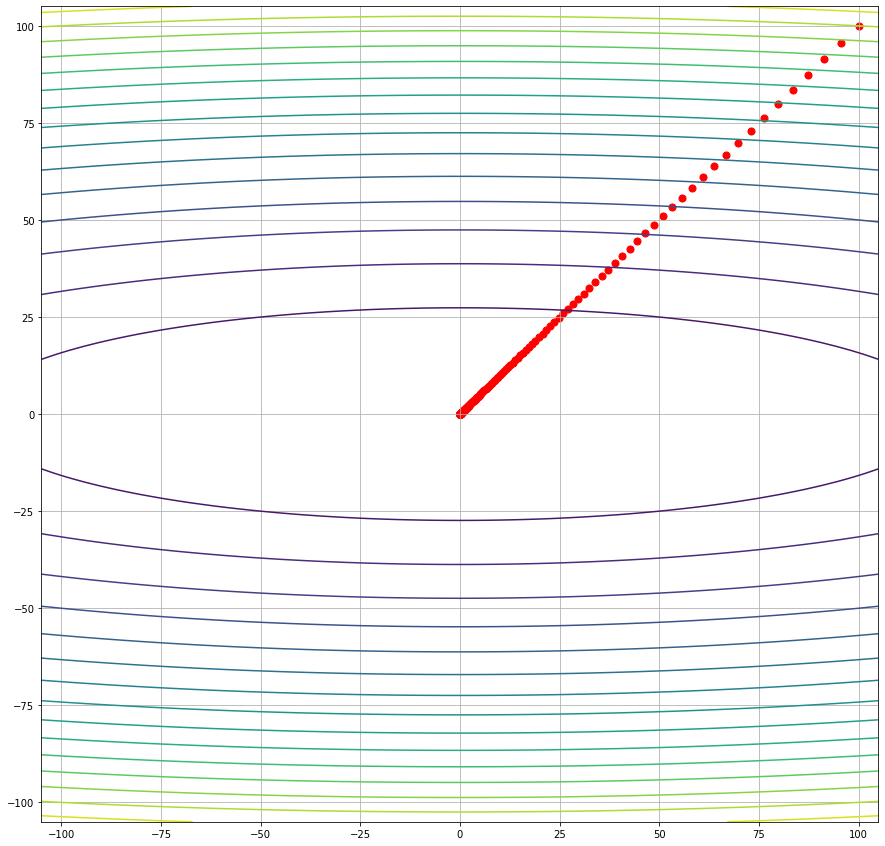

In [9]:
meth = Newton(f_2, backtracking)
meth(np.array([100, 100]))
meth.plot()